# 1. Importing Libraries

In this section, I will import the libraries that I will use in this project. I will import the following libraries:

- numpy for numerical computing
- pandas for data manipulation
- matplotlib for plotting
- seaborn for plotting
- sklearn for machine learning
- scipy for scientific computing
- statsmodels for statistical modeling

In [ ]:
# Imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 2. Loading the Data

In this section, I will load the data that I will use in this project. I will load the data from the CSV files using the pandas library. I will load the data into a pandas DataFrame.

In [ ]:
# Define path to data
file_path = "Data/"

# Load the data
crop_yield_df = pd.read_csv(file_path + "Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
fertiliser_use_df = pd.read_csv(file_path + "Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
land_temperature_change_df = pd.read_csv(file_path + "Land temperature change - FAOSTAT_data_en_2-27-2024.csv")
pesticides_use_df = pd.read_csv(file_path + "Pesticides use - FAOSTAT_data_en_2-27-2024.csv")
crop_value_df = pd.read_csv(file_path + "Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")
land_use_df = pd.read_csv(file_path + "Land use - FAOSTAT_data_en_2-22-2024.csv",low_memory=False)

# 3. Data Preparation

In this section, I will prepare the data for analysis. For each of the dataframes, will perform the following steps:
- Explore the data
- Check for missing values
- Check for duplicate rows
- Drop unnecessary columns
- Group data if necessary to get totals and averages
- Rename value column to a more descriptive name for easier reference

## 3.1. Crop Yield Data

In [ ]:
# Display the first few rows of the crop yield data
crop_yield_df.head()

In [ ]:
# Describe the crop yield data
crop_yield_df.describe()

In [ ]:

# Print information about the crop yield data
crop_yield_df.info()

In [ ]:
# Check for missing values
crop_yield_df.isnull().sum()

In [ ]:
# Check for duplicate rows
crop_yield_df.duplicated().sum()

In [ ]:
# Drop unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Note", "Item Code (CPC)", "Area Code (M49)"])

# Rename value column to yield in 100g/ha
crop_yield_df = crop_yield_df.rename(columns={"Value": "Yield in 100g/ha"})

# Display the first few rows of the crop yield data
crop_yield_df.head()

## 3.2. Fertiliser Use Data

In [ ]:
# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

In [ ]:

# Describe the fertiliser use data
fertiliser_use_df.describe()

In [ ]:

# Print information about the fertiliser use data
fertiliser_use_df.info()

In [ ]:

# Check for missing values
fertiliser_use_df.isnull().sum()

In [ ]:

# Check for duplicate rows
fertiliser_use_df.duplicated().sum()

In [ ]:
# Drop unnecessary columns
fertiliser_use_df = fertiliser_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Item Code", "Item", "Area Code (M49)"])

# Group data by country and year to get the total fertiliser use
fertiliser_use_df = fertiliser_use_df.groupby(["Area", "Year"]).sum().reset_index()

# Rename value column to total fertiliser use in tonnes
fertiliser_use_df = fertiliser_use_df.rename(columns={"Value": "Total Fertiliser Use in Tonnes"})

# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

## 3.3. Land Temperature Change Data

In [ ]:
# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

In [ ]:
# Describe the land temperature change data
land_temperature_change_df.describe()

In [ ]:
# Print information about the land temperature change data
land_temperature_change_df.info()

In [ ]:
# Filter land temperature change to get only meteorological year
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Months"] == "Meteorological year"]

# Split df into two dataframes: one for temperature change and one for standard deviation
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Temperature change"]
land_temperature_change_std_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Standard Deviation"]

# Drop unnecessary columns
land_temperature_change_df = land_temperature_change_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Months", "Months Code", "Area Code (M49)"])

# If all values for the country are missing, drop the country
land_temperature_change_df = land_temperature_change_df.groupby('Area').filter(lambda x: x[['Value']].notna().any().any())

# Impute missing values with the mean for the country
land_temperature_change_df['Value'] = land_temperature_change_df.groupby('Area',)['Value'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Check for missing values
land_temperature_change_df.isnull().sum()

In [ ]:
# Check for duplicate rows
land_temperature_change_df.duplicated().sum()

In [ ]:
# Rename value column to temperature change in degrees celsius
land_temperature_change_df = land_temperature_change_df.rename(columns={"Value": "Temperature Change in Degrees Celsius"})

# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

## 3.4. Pesticides Use Data

In [ ]:
# Display the first few rows of the pesticides use data
pesticides_use_df.head()

In [ ]:
# Describe the pesticides use data
pesticides_use_df.describe()

In [ ]:
# Print information about the pesticides use data
pesticides_use_df.info()

In [ ]:
# Get only the total pesticides used and only Agricultural Use
pesticides_use_df = pesticides_use_df[(pesticides_use_df["Item Code"] == 1357) & (pesticides_use_df["Element"] == "Agricultural Use")]
# Drop unnecessary columns
pesticides_use_df = pesticides_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Year Code", "Flag", "Flag Description", "Item Code", "Item", "Note", "Unit", "Element" , "Area Code (M49)" ])

# Check for missing values
pesticides_use_df.isnull().sum()

In [ ]:
# Check for duplicate rows
pesticides_use_df.duplicated().sum()

In [ ]:
# Rename value column to total pesticides use in tonnes
pesticides_use_df = pesticides_use_df.rename(columns={"Value": "Total Pesticides Use in Tonnes"})

# Display the first few rows of the pesticides use data
pesticides_use_df.head()

## 3.5. Crop Value Data

In [ ]:
# Display the first few rows of the crop value data
crop_value_df.head()

In [ ]:
# Describe the crop value data
crop_value_df.describe()

In [ ]:
# Print information about the crop value data
crop_value_df.info()

In [ ]:
# Drop unnecessary columns
crop_value_df = crop_value_df.drop(columns=["Domain", "Domain Code",  "Year Code", "Flag", "Flag Description", "Note", "Unit", "Item Code (CPC)", "Area Code (M49)"])

# Check for missing values
crop_value_df.isnull().sum()

In [ ]:
# Split the data into two dataframes: one for imports and one for exports
crop_value_imports_df = crop_value_df[crop_value_df["Element"] == "Import Value"]
crop_value_exports_df = crop_value_df[crop_value_df["Element"] == "Export Value"]

# Drop unnecessary columns
crop_value_imports_df = crop_value_imports_df.drop(columns=["Element", "Element Code"])
crop_value_exports_df = crop_value_exports_df.drop(columns=["Element", "Element Code"])

# Rename value column to crop value in 1000 US$
crop_value_imports_df = crop_value_imports_df.rename(columns={"Value": "Total Import Crop Value in 1000 US$"})
crop_value_exports_df = crop_value_exports_df.rename(columns={"Value": "Total Export Crop Value in 1000 US$"})

# Display the first few rows of the crop import data
crop_value_imports_df.head()

In [ ]:
# Display the first few rows of the crop import data
crop_value_exports_df.head()

## 3.6. Land Use Data

In [ ]:
# Display the first few rows of the land use data
land_use_df.head()

In [ ]:
# Describe the land use data
land_use_df.describe()

In [ ]:
# Print information about the land use data
land_use_df.info()

In [ ]:
# Filter to select only agricultural land
land_use_df = land_use_df[land_use_df["Item"] == "Agricultural land"]
# Drop unnecessary columns
land_use_df = land_use_df.drop(columns=["Domain", "Domain Code", "Year Code", "Flag", "Flag Description", "Note", "Element", "Element Code", "Item Code", "Item", "Unit", "Area Code (M49)"])

# Check for missing values
land_use_df.isnull().sum()

In [ ]:
# Check for duplicate rows
land_use_df.duplicated().sum()

In [ ]:
# Rename value column to agricultural land in hectares
land_use_df = land_use_df.rename(columns={"Value": "Agricultural Land in Hectares"})
# Display the first few rows of the land use data
land_use_df.head()

# 3.7. Merging Data

In this section, I will merge all the dataframes into a single dataframe.


### Standardising Items
Combine different items so that they match across datasets, combining them to make a harmonised dataset. This will help in merging the datasets.

In [ ]:
# Views the unique items in the 'Item' column of the datasets
print("Unique Items in Crops Production Indicators:\n", crop_yield_df['Item'].unique())

In [ ]:
print("Unique Items in Food Trade Indicators:\n", crop_value_exports_df['Item'].unique())

In [ ]:
# Create dictionaries to map the items to their respective categories
harmonized_mapping = {
    'Cereals, primary': 'Cereals and Grains',
    'Citrus Fruit, Total': 'Fruits and Vegetables',
    'Fibre Crops, Fibre Equivalent': 'Fibre and Textile Crops',
    'Fruit Primary': 'Fruits and Vegetables',
    'Oilcrops, Cake Equivalent': 'Nuts and Oilseeds',
    'Oilcrops, Oil Equivalent': 'Nuts and Oilseeds',
    'Pulses, Total': 'Miscellaneous',  # Generalized here to ensure it's not lost
    'Roots and Tubers, Total': 'Fruits and Vegetables',  # Grouped with Fruits and Vegetables for broader inclusion
    'Sugar Crops Primary': 'Sugar and Sweeteners',
    'Treenuts, Total': 'Nuts and Oilseeds',
    'Vegetables Primary': 'Fruits and Vegetables',
    'Cereals and Preparations': 'Cereals and Grains',
    'Fats and Oils (excluding Butter)': 'Nuts and Oilseeds',
    'Meat and Meat Preparations': 'Animal Products',
    'Sugar and Honey': 'Sugar and Sweeteners',
    'Fruit and Vegetables': 'Fruits and Vegetables',
    'Dairy Products and Eggs': 'Animal Products',
    'Alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Non-alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Other food': 'Miscellaneous',
    'Non-food': 'Miscellaneous',
    'Non-edible Fats and Oils': 'Miscellaneous',
    'Tobacco': 'Miscellaneous',
}

# Adds a Harmonised Item column to the datasets with the mapped items
crop_yield_df['Harmonised Item'] = crop_yield_df['Item'].map(harmonized_mapping)
crop_value_exports_df['Harmonised Item'] = crop_value_exports_df['Item'].map(harmonized_mapping)
crop_value_imports_df['Harmonised Item'] = crop_value_imports_df['Item'].map(harmonized_mapping)

# Drops unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=['Item'])
crop_value_exports_df = crop_value_exports_df.drop(columns=['Item'])
crop_value_imports_df = crop_value_imports_df.drop(columns=['Item'])

# Group the data by Area, Year, and Harmonised Item
crop_yield_df = crop_yield_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()
crop_value_exports_df = crop_value_exports_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()
crop_value_imports_df = crop_value_imports_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()

# Display the first few rows of the datasets
print("Crops Production Indicators:\n", crop_yield_df.head())

In [ ]:
print("Food Trade Indicators (Exports):\n", crop_value_exports_df.head())
print("Food Trade Indicators (Imports):\n", crop_value_imports_df.head())

### 3.7.2 Merging Data

In this section, I will merge all the dataframes into a single dataframe. I will merge the dataframes on the following columns:
- Area
- Area Code (M49)
- Year
- Harmonised Item (for Crop Yield and Crop Value Data)

In [ ]:
# Merge all the dataframes into a single dataframe
merged_df = crop_yield_df.merge(crop_value_exports_df, how="inner", left_on=["Area", "Year", 'Harmonised Item'], right_on=["Area", "Year", 'Harmonised Item'])
merged_df = merged_df.merge(crop_value_imports_df, how="inner", left_on=["Area", "Year", 'Harmonised Item'], right_on=["Area", "Year", 'Harmonised Item'])
merged_df.head()
merged_df = merged_df.merge(land_temperature_change_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(pesticides_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(land_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(fertiliser_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])

In [ ]:
# Describe the merged dataframe
merged_df.describe()

In [ ]:
# Show the shape of the merged dataframe (8446, 10)
merged_df.shape

In [ ]:
# Count the number of countries in the merged dataframe (156)
merged_df['Area'].nunique()

In [ ]:
# Count number of years in the merged dataframe (20)
merged_df['Year'].nunique()

# 4. Exploratory Data Analysis 

In this section, I will perform exploratory data analysis on the merged data. I will explore the following:
- Crop Yield Analysis
- Fertiliser Use Analysis
- Land Temperature Change Analysis
- Pesticides Use Analysis
- Crop Value Analysis
- Land Use Analysis
- Correlation Analysis

## 4.1 Crop Yield Analysis

In this section, I will perform exploratory data analysis on the crop yield data. I will explore the following:
- Mean crop yield over the years for all countries by crop type
- Crop yield distribution (using log scale and non-zero values only)
- Crop yield correlation with export crop value
- Frequency of harmonised items

In [ ]:
# # Prepare the data for analysis
crop_yield_mean = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].mean()
crop_yield_total = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].sum()
non_zero_crop_yield = crop_yield_df[crop_yield_df['Yield in 100g/ha'] > 0]

In [ ]:
# Plot the mean crop yield over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Crop Yield Over the Years for all Countries by Crop Type")

crop_yield_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Yield in 100g/ha")

plt.show()

In [ ]:
# Plot the distribution of crop yield
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Log Distribution of Crop Yield")

sns.histplot(np.log1p(non_zero_crop_yield['Yield in 100g/ha']), kde=True, ax=ax)
plt.xlabel("Yield in 100g/ha")

plt.show()
merged_df.describe()

In [ ]:
# Count the values and reset the index
temp = crop_yield_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

In [ ]:
# Plot the correlation between crop yield and export crop value
fig, ax = plt.subplots(figsize=(15,9))
temp = merged_df.groupby('Year').agg({
    'Yield in 100g/ha': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

plt.suptitle("Correlation between Crop Yield and Export Crop Value")

sns.scatterplot(data=temp, x='Yield in 100g/ha', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Yield in 100g/ha', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Yield in 100g/ha")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.2 Fertiliser Use Analysis

In this section, I will perform exploratory data analysis on the fertiliser use data. I will explore the following:
- Mean fertiliser use over the years for all countries
- Fertiliser use distribution (using log scale and non-zero values only)
- Fertiliser use correlation with export crop value

In [ ]:
# Prepare the data for analysis
fertiliser_use_mean = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].mean()
fertiliser_use_total = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].sum()

In [ ]:
# Plot the mean fertiliser use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Fertiliser Use Over the Years for all Countries")

fertiliser_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Fertiliser Use in Tonnes")

plt.show()

In [ ]:
# Plot the distribution of fertiliser use
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Log Distribution of Fertiliser Use")

sns.histplot(np.log1p(fertiliser_use_df['Total Fertiliser Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Fertiliser Use in Tonnes")

plt.show()

In [ ]:
# Plot the correlation between fertiliser use and export crop value
fig, ax = plt.subplots(figsize=(15,9))
temp = merged_df.groupby('Year').agg({
    'Total Fertiliser Use in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

plt.suptitle("Correlation between Fertiliser Use and Export Crop Value")

sns.scatterplot(data=temp, x='Total Fertiliser Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Fertiliser Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Fertiliser Use in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

In [ ]:
# Count the values and reset the index
temp = crop_yield_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.3 Land Temperature Change Analysis

In this section, I will perform exploratory data analysis on the land temperature change data. I will explore the following:
- Mean land temperature change over the years for all countries
- Land temperature change distribution
- Land temperature change correlation with export crop value

In [ ]:
# Prepare the data for analysis
land_temperature_change_mean = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].mean()
land_temperature_change_total = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].sum()

In [ ]:
# Plot the mean land temperature change over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Land Temperature Change Over the Years for all Countries")

land_temperature_change_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Temperature Change in Degrees Celsius")

plt.show()

In [ ]:
# Plot the distribution of land temperature change
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Distribution of Land Temperature Change")

sns.histplot(land_temperature_change_df['Temperature Change in Degrees Celsius'], kde=True, ax=ax)
plt.xlabel("Temperature Change in Degrees Celsius")

plt.show()

In [ ]:
# Plot the correlation between land temperature change and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Land Temperature Change and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Temperature Change in Degrees Celsius': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Temperature Change in Degrees Celsius', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Temperature Change in Degrees Celsius', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Temperature Change in Degrees Celsius")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.4 Pesticides Use Analysis

In this section, I will perform exploratory data analysis on the pesticides use data. I will explore the following:
- Mean pesticides use over the years for all countries
- Distribution of pesticides use
- Pesticides use correlation with crop yield

In [ ]:
# Prepare the data for analysis
pesticides_use_mean = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].mean()
pesticides_use_total = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].sum()

In [ ]:
# Plot the mean pesticides use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Pesticides Use Over the Years for all Countries")

pesticides_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Pesticides Use in Tonnes")

plt.show()

In [ ]:
# Plot the distribution of pesticides use
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Pesticides Use")

sns.histplot(np.log1p(pesticides_use_df['Total Pesticides Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Pesticides Use in Tonnes")

plt.show()

In [ ]:
# Plot the correlation between pesticides use and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Pesticides Use and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Pesticides Use in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Pesticides Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Pesticides Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Pesticides Use in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

### 4.5 Crop Value Analysis

In this section, I will perform exploratory data analysis on the crop value data (both import and export). I will explore the following:
- Mean crop value over the years for all countries by crop type
- Distribution of crop value (non-zero values only)
- Crop value correlation with crop yield
- Frequency of harmonised items

In [ ]:
# Prepare the data for analysis
crop_value_exports_mean = crop_value_exports_df.groupby(['Year', 'Harmonised Item'])['Total Export Crop Value in 1000 US$'].mean()
crop_value_imports_mean = crop_value_imports_df.groupby(['Year', 'Harmonised Item'])['Total Import Crop Value in 1000 US$'].mean()
non_zero_crop_value_exports = crop_value_exports_df[crop_value_exports_df['Total Export Crop Value in 1000 US$'] > 0]
non_zero_crop_value_imports = crop_value_imports_df[crop_value_imports_df['Total Import Crop Value in 1000 US$'] > 0]

In [ ]:
# Plot the mean import crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Import Crop Value Over the Years for all Countries by Crop Type")

crop_value_imports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Import Crop Value in 1000 US$")
plt.show()

In [ ]:
# Plot the mean export crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Export Crop Value Over the Years for all Countries by Crop Type")

crop_value_exports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Export Crop Value in 1000 US$")
plt.show()

In [ ]:
# Plot the log1p distribution of import crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Import Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_imports['Total Import Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Import Crop Value in 1000 US$")
plt.show()

In [ ]:
# Plot the log1p distribution of export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Export Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_exports['Total Export Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Export Crop Value in 1000 US$")
plt.show()

In [ ]:
# Plot the correlation between import crop value and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Import Crop Value and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Import Crop Value in 1000 US$': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Import Crop Value in 1000 US$', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Import Crop Value in 1000 US$', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Import Crop Value in 1000 US$")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

In [ ]:
# Count the values and reset the index
temp = crop_value_imports_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

In [ ]:
# Count the values and reset the index
temp = crop_value_exports_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.6 Land Use Analysis

In this section, I will perform exploratory data analysis on the land use data. I will explore the following:
- Mean agricultural land over the years for all countries
- Total agricultural land over the years for all countries
- Agricultural land distribution
- Agricultural land correlation with crop yield

In [ ]:
# Prepare the data for analysis
land_use_mean = land_use_df.groupby('Year')['Agricultural Land in Hectares'].mean()
land_use_total = land_use_df.groupby('Year')['Agricultural Land in Hectares'].sum()
non_zero_land_use = land_use_df[land_use_df['Agricultural Land in Hectares'] > 0]

In [ ]:
# Plot the mean agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Agricultural Land Over the Years for all Countries")

land_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Agricultural Land in Hectares")
plt.show()

In [ ]:
# Plot the total agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Total Agricultural Land Over the Years for all Countries")

land_use_total.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Agricultural Land in Hectares")
plt.show()

In [ ]:
# Plot the distribution of agricultural land
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Agricultural Land")

sns.histplot(np.log1p(non_zero_land_use['Agricultural Land in Hectares']), kde=True, ax=ax)
plt.xlabel("Agricultural Land in Hectares")
plt.show()

In [ ]:
# Plot the correlation between agricultural land and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Agricultural Land and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Agricultural Land in Hectares': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Agricultural Land in Hectares', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Agricultural Land in Hectares', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit

plt.xlabel("Agricultural Land in Hectares")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.7 Merged Data Analysis

In this section, I will perform exploratory data analysis on the merged data. I will explore the following:
- Frequency of harmonised items
- Correlation analysis

## 4.7.1 Frequency of Harmonised Items

In [ ]:
# Count the values and reset the index
temp = merged_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")   

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.7.2 Correlation Analysis

In this section, I will perform correlation analysis on the merged data. I will generate a correlation matrix and plot a heatmap to visualise the correlations between the variables.

In [ ]:
# Generate a correlation matrix
numeric_df = merged_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

In [ ]:
# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation Heatmap")

sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.show()

In [ ]:
# Print the correlation values with the target variable
correlation_matrix['Total Export Crop Value in 1000 US$'].sort_values(ascending=False)

In [ ]:
merged_df = merged_df.drop(columns=['Yield in 100g/ha', 'Temperature Change in Degrees Celsius']) # Drop columns with low correlation

# 5. Data Preprocessing

In this section, I will preprocess the data for machine learning. I will perform the following steps:
- Log Transform the Numeric Variables
- Remove Outliers using the Z-score method with a threshold of 3

## 5.1 Log Transform the Numeric Variables

In this section, I will log transform the numeric variables in the merged data.

In [ ]:
# Select the names of numeric columns, ensuring 'Year' is excluded
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('Year')
# Apply np.log1p to all selected numeric columns
merged_df[numeric_cols] = merged_df[numeric_cols].apply(np.log1p)

In [ ]:
# Display the first few rows of the merged data
merged_df.describe()

## 5.2 Remove Outliers

In this section, I will remove outliers from the merged data using the Z-score method with a threshold of 3. I will remove rows with Z-scores greater than 3.

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
# Calculate the Z-scores
z_scores = np.abs(stats.zscore(merged_df.select_dtypes(include=[np.number]).drop('Year', axis=1)))
# Remove rows with Z-scores greater than 3
merged_df = merged_df[(z_scores < 3).all(axis=1)]
# Display the shape of the merged data (8070, 9)
merged_df.shape

In [ ]:
# Display the distribution of the variables after removing outliers
merged_df.hist(figsize=(15, 9), bins=30) 
plt.tight_layout()
plt.show()

# 7. Multi-Layer Perceptron (MLP) Model

In this section, I will build a Multi-Layer Perceptron (MLP) model to predict the total export crop value in 1000 US$ using the merged data. I will perform the following steps:
- Split the data into features and target variable
- Split the data into training and testing sets
- Encode the categorical variables (Harmonised Item and Area)
- Scale the features
- Train the MLPRegressor
- Predict on the test set
- Evaluate the model
- Plot the results

## 7.1 Split the Data

In this section, I will split the data into features and the target variable. I will then split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

df = merged_df

# Separate the features and the target variable
X = df.drop('Total Export Crop Value in 1000 US$', axis=1)
y = df['Total Export Crop Value in 1000 US$']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7.2 Encode the Categorical Variables

In this section, I will encode the categorical variables (Harmonised Item and Area) using the OneHotEncoder.

In [824]:
# Apply the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
harmonised_item_train_encoded = encoder.fit_transform(X_train[['Harmonised Item', 'Area']])
harmonised_item_test_encoded = encoder.transform(X_test[['Harmonised Item','Area']])

# Convert encoded data into a DataFrame
harmonised_item_train_df = pd.DataFrame(harmonised_item_train_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
harmonised_item_test_df = pd.DataFrame(harmonised_item_test_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)

# Concatenate the encoded variables back with the original training and testing data
X_train_processed = pd.concat([X_train.drop(['Harmonised Item','Area'], axis=1), harmonised_item_train_df], axis=1)
X_test_processed = pd.concat([X_test.drop(['Harmonised Item','Area'], axis=1), harmonised_item_test_df], axis=1)

## 7.3 Scale the Features

In this section, I will scale the features using the StandardScaler.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

## 7.4 Train the MLPRegressor

In this section, I will train the MLPRegressor using the training data.

In [ ]:
# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
# Train the MLPRegressor
mlp.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

## 7.5 Evaluate the Model

In this section, I will evaluate the model using the Mean Absolute Error and R^2 Score.

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2_score = mlp.score(X_test_scaled, y_test)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2_score}')

## 7.6 Plot the Results

In this section, I will plot the results of the MLPRegressor model. I will use the following plots:
- Scatter plot of predicted vs actual total export crop value
- Density plot of actual vs predicted values
- Scatter plots of predicted vs actual total export crop value by harmonised item

### 7.6.1 Scatter Plot of Predicted vs Actual Total Export Crop Value

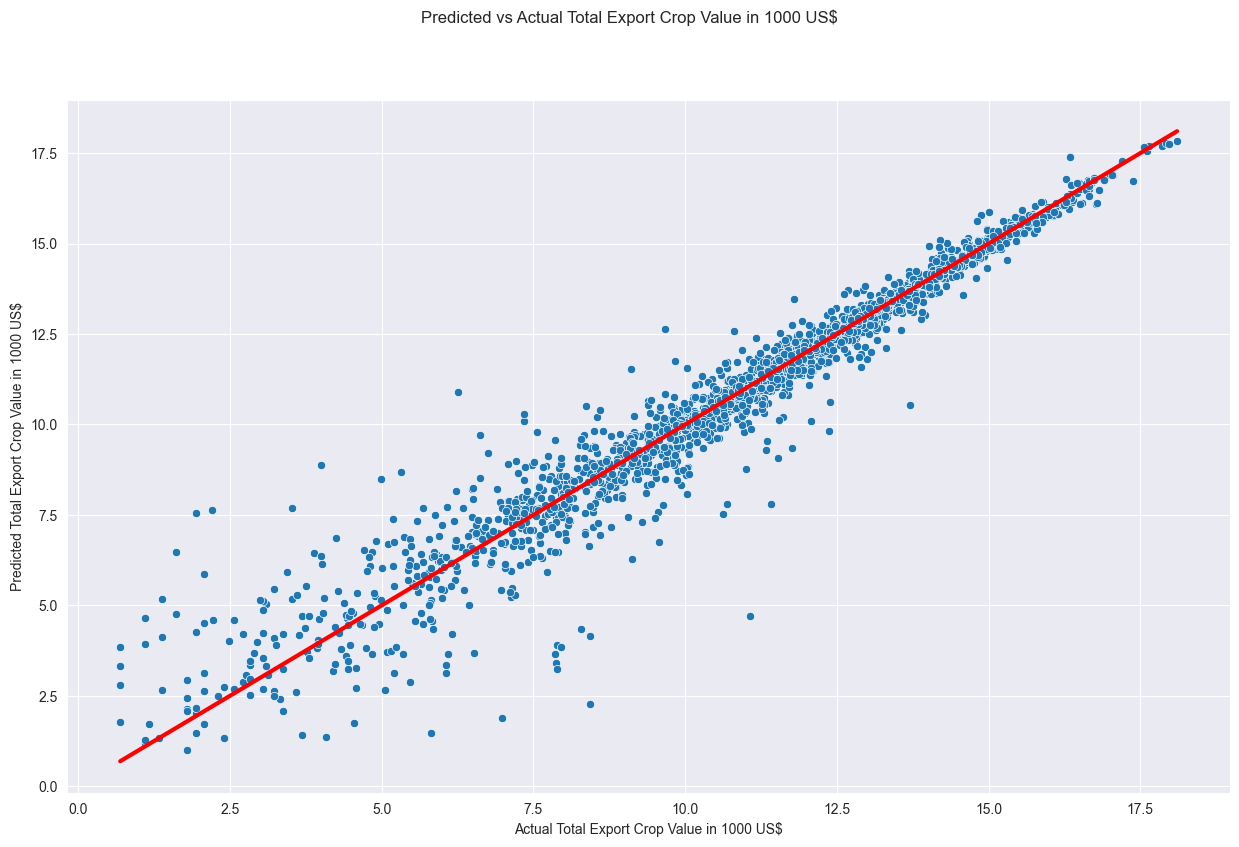

In [826]:
# Plotting the results as a scatter plot
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$")
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
# Add a line for predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.xlabel("Actual Total Export Crop Value in 1000 US$")
plt.ylabel("Predicted Total Export Crop Value in 1000 US$")
plt.show()

### 7.6.2 Density Plot of Actual vs Predicted Values

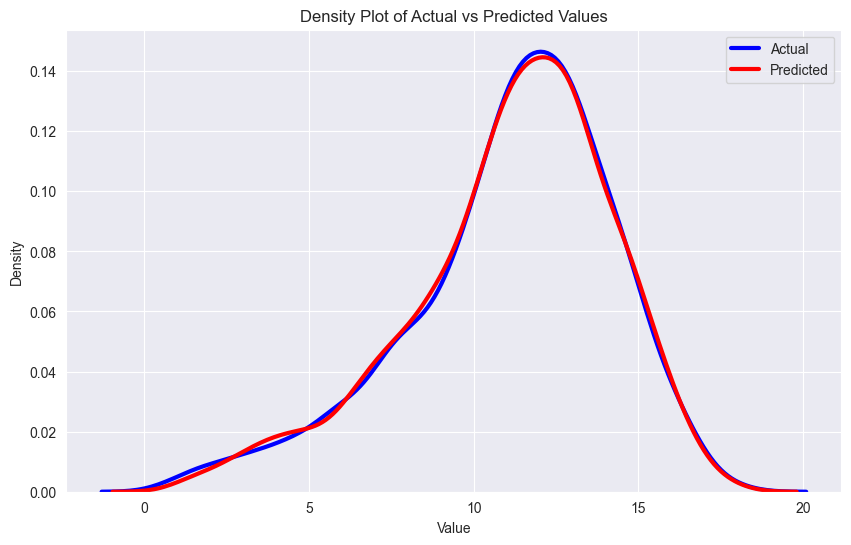

In [827]:
# Plot the density plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', linewidth=3)
sns.kdeplot(y_pred, label='Predicted', color='red', linewidth=3)
plt.title('Density Plot of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### 7.6.3 Scatter Plots of Predicted vs Actual Total Export Crop Value by Harmonised Item

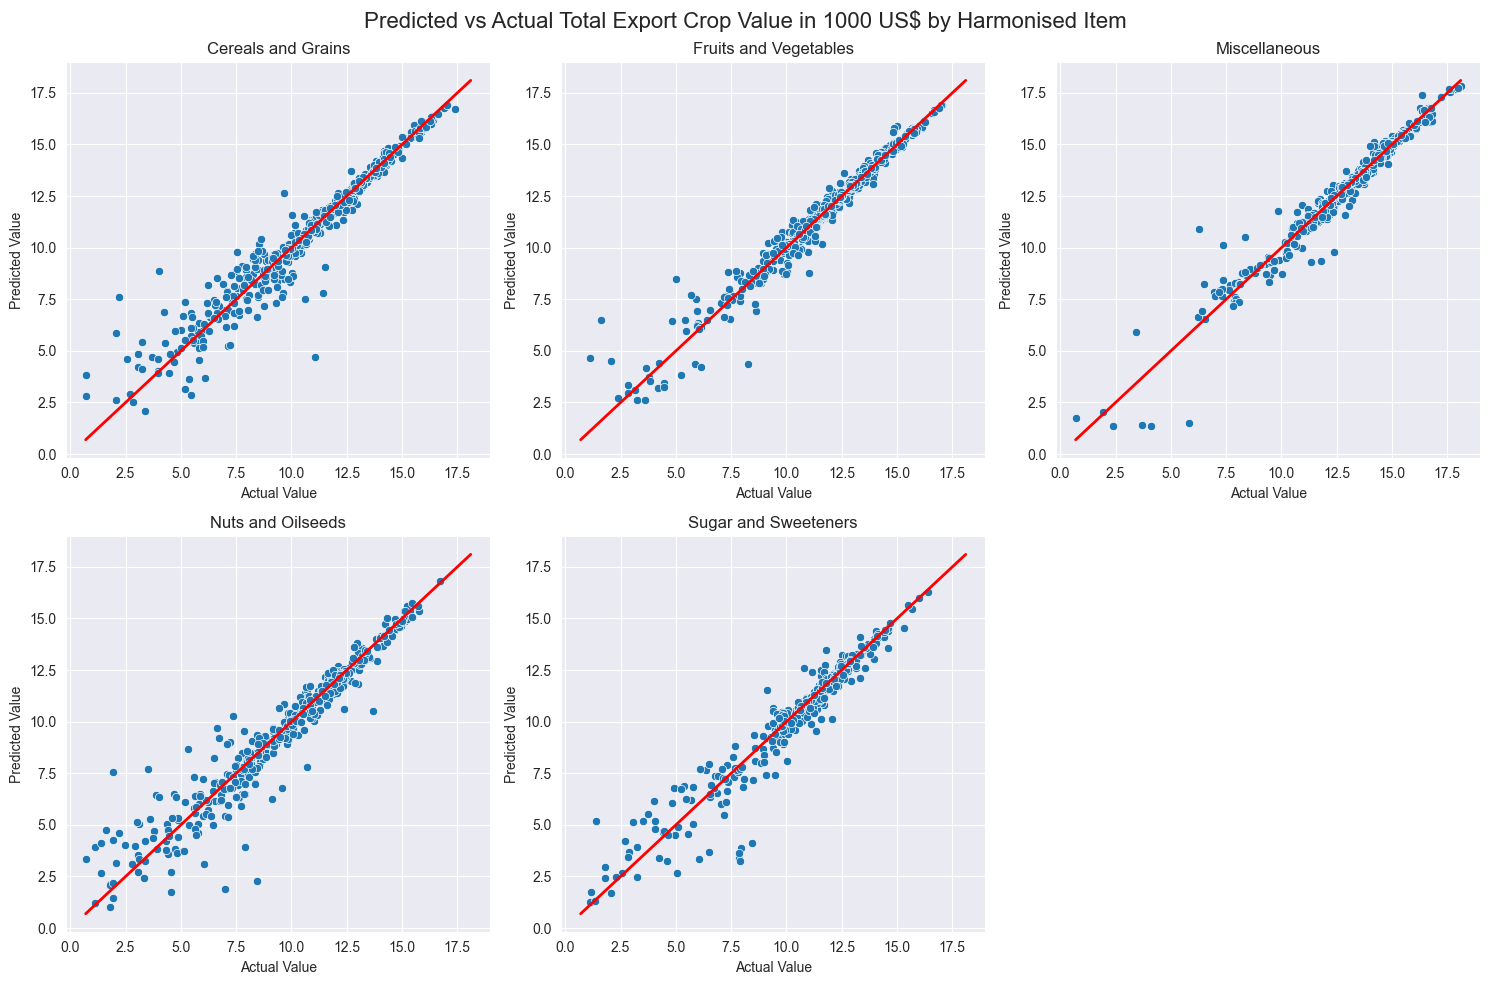

In [830]:
# Assuming y_pred is a numpy array; convert to pandas Series with y_test index for alignment
y_pred_series = pd.Series(y_pred, index=y_test.index)

# Number of unique items
unique_items = encoder.get_feature_names_out()
# Filter out Area columns
unique_items = [item for item in unique_items if 'Area_' not in item]

n_items = len(unique_items)
cols = 3  # Number of columns in the subplot grid
rows = np.ceil(n_items / cols).astype(int)  # Number of rows in the subplot grid

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust the size as needed
fig.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$ by Harmonised Item", fontsize=16)

for i, item in enumerate(unique_items):
    ax = axes.flatten()[i]
    mask = X_test_processed[item] == 1
    sns.scatterplot(x=y_test[mask], y=y_pred_series[mask], ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Identity line
    ax.set_title(item.replace('Harmonised Item_', ''))  # Adjust title to clean up item names
    ax.set_xlabel("Actual Value")
    ax.set_ylabel("Predicted Value")

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()